# Radiative Processes and Stellar Atmospheres
## Homework 1


### Problem 2

Plot (using python) a Planck function at T = 100 K (a typical temperature
for warm interstellar dust), and T = 10, 000 K (representative of a hot star).
Show that a hotter object is brighter than a cold object at all wavelengths (say,
in this example, from 912  ̊A − 1 μm).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy 
from astropy.modeling import models
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support

import warnings
warnings.filterwarnings("ignore")

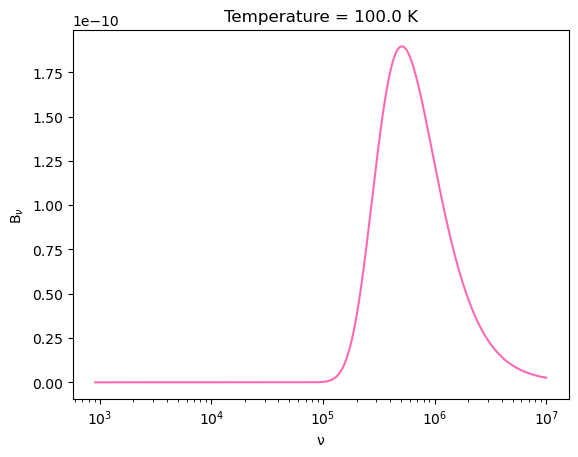

In [99]:
T1 = 100*u.K #warm interstellar dust

# Calculate blackbody curve with help from astropy
bb = BlackBody(temperature=T1)
wav = np.arange(912, 1e7)*u.AA
flux = bb(wav)

# Plotting
plt.plot(wav, flux, color='hotpink')
plt.xscale('log')
#plt.yscale('log')

plt.title('Temperature = '+str(T1))
plt.xlabel('\u03BD')
plt.ylabel('B$_{\u03BD}$')

plt.savefig('homework1_T100.pdf');


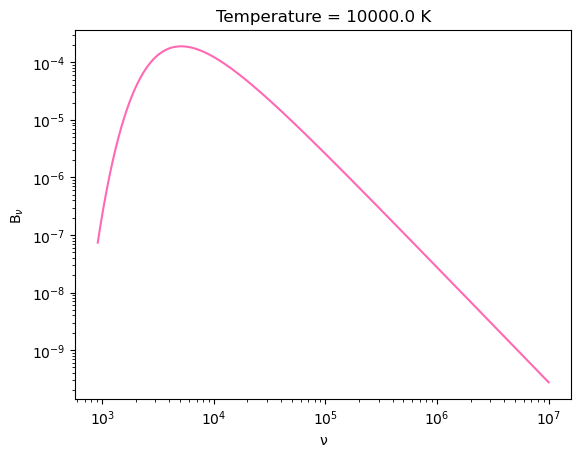

In [101]:
T2 = 10000*u.K #hot star

# Calculate blackbody curve with help from astropy
bb2 = BlackBody(temperature=T2)
wav2 = np.arange(912, 1e7)*u.AA
flux2 = bb2(wav2)

# Plotting
plt.plot(wav2, flux2, color='hotpink')
plt.xscale('log')
plt.yscale('log')

plt.title('Temperature = '+str(T2))
plt.xlabel('\u03BD')
plt.ylabel('B$_{\u03BD}$')

plt.savefig('homework1_T10000.pdf');

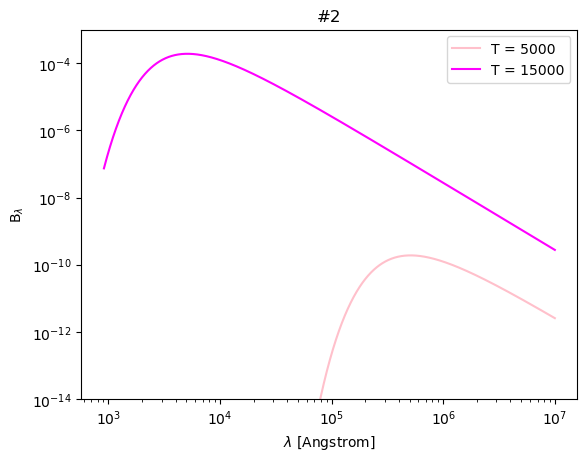

In [162]:
plt.plot(wav, flux, color='pink', label='T = '+str(T1))
plt.plot(wav2, flux2, color='magenta', label='T = '+str(T2))

plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-14,10**-3)
plt.legend()
plt.xlabel('$\u03BB$ [Angstrom]')
plt.ylabel('B$_{\u03BB}$')
plt.title('#2')

plt.savefig('homework1_problem2.pdf');

### Problem 4

Consider a stellar atmosphere composed of pure helium. The aim is to
find the temperature at the middle of the He I partial ionization zone, where
half of the He I atoms have been ionized (such as the atmosphere of a =white
dwarf). Assume for simplicity that the electron pressure is a constant Pe =
200 dyne cm−2. The ionization energies of neutral helium and singly ionized he-
lium are respectively: χI = 24.6 eV and χII = 54.4 eV. The partition functions
are UI = 1, UII = 2 and UIII = 1 for the neutral, first ionized and second
ionized atoms, respectively.

#### (a) Find NII /NI and NIII /NII for temperatures of 5000 K, 15,000 K and 25,000 K. How do they compare?

In [137]:
import numpy as np

In [154]:
def Saha(temp, u_up, u_low, x_low):
    
    #Constants
    k_boltzmann = 1.380649e-16     #erg K^-1
    P_e = 200                      #dyne cm^-2
    m_electron = 9.1094e-28        #g
    h_planck = 6.6261e-27          #cm^2 g s^-1
    

    Nplus_Ni = ((2*k_boltzmann*temp)/P_e) * (u_up/u_low) * ((2*np.pi*m_electron*k_boltzmann*temp)/h_planck**2)**(3/2) * np.e**(-x_low/(k_boltzmann*temp))
    
    return Nplus_Ni
    

In [155]:
T1 = 5000      #K
T2 = 15000     #K
T3 = 25000     #K
uI = 1
uII = 2
uIII = 1
xI = 3.9e-11   #erg
xII = 8.7e-11  #erg

forT1_NII_NI = Saha(T1, uII, uI, xI)
forT1_NII_NI


3.4344177573004834e-18

In [156]:
forT1_NIII_NII = Saha(T1, uIII, uII, xII)
forT1_NIII_NII


5.4475936335973415e-49

In [159]:
forT2_NII_NI = Saha(T2, uII, uI, xI)
forT2_NII_NI

1.2181010619388593

In [158]:
forT2_NIII_NII = Saha(T2, uIII, uII, xII)
forT2_NIII_NII


2.616739690697341e-11

In [160]:
forT3_NII_NI = Saha(T3, uII, uI, xI)
forT3_NII_NI

8160.384244361448

In [161]:
forT3_NIII_NII = Saha(T3, uIII, uII, xII)
forT3_NIII_NII


0.0018626571856397757

#### (c) Plot (in python) NII /Ntotal for the range of temperatures 5000 K to 25,000 K. What is the temperature at the middle of the He I partial ionization zone? What does that tell you about DB white dwarf atmospheres?



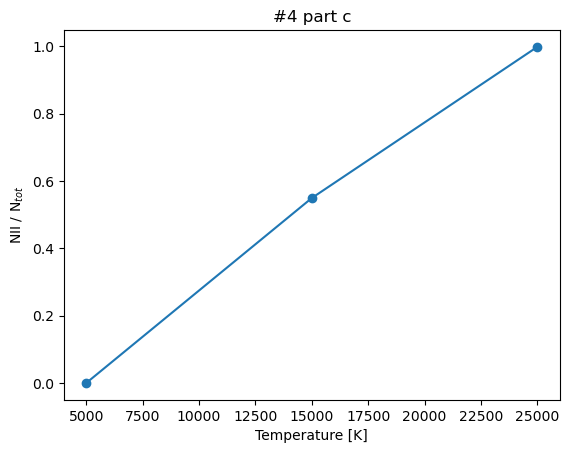

In [175]:
#Calculate NII/Ntot for each temperature
forT1_NII_Ntot = forT1_NII_NI / (1 + forT1_NII_NI + (forT1_NIII_NII * forT1_NII_NI))
forT2_NII_Ntot = forT2_NII_NI / (1 + forT2_NII_NI + (forT2_NIII_NII * forT2_NII_NI))
forT3_NII_Ntot = forT3_NII_NI / (1 + forT3_NII_NI + (forT3_NIII_NII * forT3_NII_NI))

#Save values to arrays to make plotting easier
n_array = [forT1_NII_Ntot, forT2_NII_Ntot, forT3_NII_Ntot]
temp_array = [5000, 15000, 25000]

plt.plot(temp_array, n_array)
plt.scatter(temp_array, n_array)

#plt.yscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel('NII / N$_{tot}$')
plt.title('#4 part c');



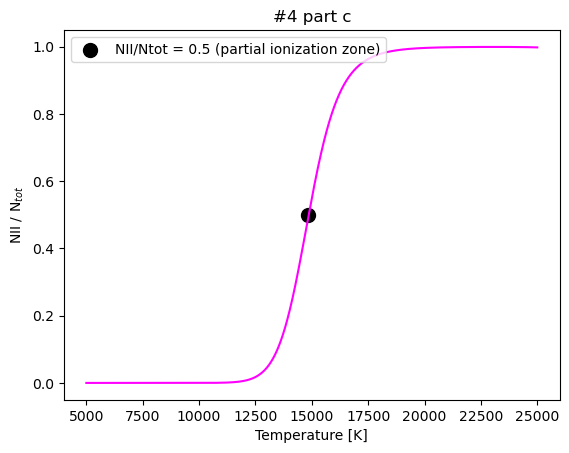

In [213]:
# Values given
T1 = 5000      #K
T2 = 15000     #K
T3 = 25000     #K
uI = 1
uII = 2
uIII = 1
xI = 3.9e-11   #erg
xII = 8.7e-11  #erg

temp_range = np.arange(5000, 25000+1, 10)

# Calculate NII/NI and NIII/NII for a range of temperatures
NII_NI = []
NIII_NII = []
for t in temp_range:
    NII_NI.append(Saha(t, uII, uI, xI))
    NIII_NII.append(Saha(t, uIII, uII, xII))  
NII_NI = np.array(NII_NI)
NIII_NII = np.array(NIII_NII)

# Calculate NII/Ntot based on part b
NII_Ntot = NII_NI / (1 + NII_NI + (NIII_NII * NII_NI))

plt.plot(temp_range, NII_Ntot, color='magenta')
plt.xlabel('Temperature [K]')
plt.ylabel('NII / N$_{tot}$')
plt.title('#4 part c')
#plt.grid()
#plt.axhline(0.5, linestyle='dotted')
plt.scatter(14850, 0.5, color='black', s=100, label='NII/Ntot = 0.5 (partial ionization zone)')
plt.legend(loc='upper left')

plt.savefig('homework1_4partC.pdf');


In [205]:
np.where(NII_Ntot > 0.49)

(array([ 984,  985,  986, ..., 1998, 1999, 2000]),)

In [209]:
temp_range[985]

14850